## House Price Prediction

#### FLOW OF THE PROJECT
- Data Exploration
- Data Preparation (Preprocessing - fixing outliers, missing values, noise, scaling/normalization)
- EDA :
    - Categorical Analysis
    - Numerical Analysis
- Modelling

In [1]:
import pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("house_data.csv")

In [3]:
h_df = df.copy()

In [4]:
h_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
h_df.shape

(4600, 18)

In [6]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
h_df[['floors','bathrooms','bedrooms']] = \
    h_df[['floors','bathrooms','bedrooms']].astype("int")

h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int32  
 3   bathrooms      4600 non-null   int32  
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   int32  
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
# Statistical values using .describe() method
pd.set_option("display.float_format", lambda x : format(x,".2f"))
h_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,1.79,2139.35,14852.52,1.46,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.75,963.21,35884.44,0.55,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.00,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.00,1980.00,7683.00,1.00,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.00,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.00,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [9]:
#Let's observe the number of rows where price is 0
(h_df['price']==0).sum()

49

In [10]:
h_df['price'].replace(0,np.nan,inplace=True)

In [11]:
#Once the values are replaced to nan let's fill them with mean
h_df['price'].fillna(value=h_df["price"].mean(), inplace=True)

In [12]:
''' You have to find the outliers if they exist in this dataframe '''
#Google the concept of boxplots or IQRs (Inter Quartile Ranges) *infact first learn what is a 
# quartile (0,1/4, 1/2, 3/4, 1) or (0% , 25%, 50%, 75%, 100%) use df.describe() and study it

' You have to find the outliers if they exist in this dataframe '

In [13]:
#Function to replace outliers
def replace_outliers_with_nan_iqr(df,feature, inplace = True):
    desired_feature = df[feature]
    
    q1,q3 = desired_feature.quantile([0.25,0.75])
    iqr = q3-q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    
    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [14]:
feature_with_outlier = ["price","sqft_lot","sqft_basement"]
# Taking these columns(features) as they have outlier

In [15]:
#Get_Means for them
feature_means = h_df[feature_with_outlier].mean()

for f in feature_with_outlier:
    replace_outliers_with_nan_iqr(h_df, f, inplace=True)
    
#Replace these NaNs with means
h_df.fillna(feature_means, inplace=True)
h_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [16]:
#Let us drop the Insignificant Features
h_df.drop(['street','date','country'], axis=1, inplace=True)

In [17]:
#replace city names and statezip to numeric values
h_df['city'], _ = pd.factorize(h_df['city'])
h_df['statezip'], _ = pd.factorize(h_df['statezip']) # function returns factorized df with list of classes


### EDA

In [18]:
# Let's visualize the categorical data first and see the relation with target "price"

def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.boxenplot(data=df , x=feature, y='price')
    ax.set_title(f"{feature} vs price", fontdict={'fontsize':18})
    
#draw the countplot of categortical variables

def draw_cate_countplot(df, feature):
    plt.grid(True)
    ax = sns.countplot(x=df[feature])
    ax.set_title(f"{feature}\'s count", fontdict={'fontsize':18})
    

# Distribution for NUMERIC feature

def draw_numeric_dist(df, feature):
    ax = sns.kdeplot(df[feature], fill=True)
    plt.grid(True)
    ax.set_title(f"{feature}\'s distribution", fontdict={'fontsize':18})
    
def draw_numeric_target_scatter(df, feature):
    ax = sns.scatterplot(data=df, x=feature, y="price")
    ax.set_title(f"{feature} vs price", fontdict={'fontsize':18})
    plt.grid(True)

In [19]:
h_df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
2760,540000.00,4,2,2050,14852.52,2,0,0,4,2050,0.00,1989,0,15,32
1570,525000.00,5,2,2630,9216.00,2,0,0,3,2630,0.00,2003,0,21,48
1921,285000.00,3,2,2437,5136.00,2,0,0,3,2437,0.00,2011,0,9,70
3763,392000.00,5,2,3740,14852.52,1,0,0,3,2240,1500.00,1958,2004,10,14
3224,464500.00,3,1,1150,10466.00,1,0,0,5,1150,0.00,1959,0,3,15
3865,496000.00,2,1,900,9260.00,1,0,0,3,900,0.00,1946,0,1,27
261,581000.00,4,2,2510,13695.00,1,0,0,4,1280,1230.00,1961,2001,13,21
2997,830000.00,5,2,2780,10192.00,2,0,0,4,2780,0.00,1978,2000,3,12
3303,418800.00,4,2,2100,9984.00,1,0,0,4,1290,810.00,1973,0,25,54
1969,555000.00,4,2,2020,10720.00,1,0,0,4,1420,600.00,1976,1992,4,4


In [20]:
# Segregate the categorical and numerical features
cate_features = ['bedrooms',
                 'bathrooms',
                 'floors',
                 'waterfront',
                 'view',
                 'condition']

numeric_features = list(set(h_df.columns) - set(cate_features))

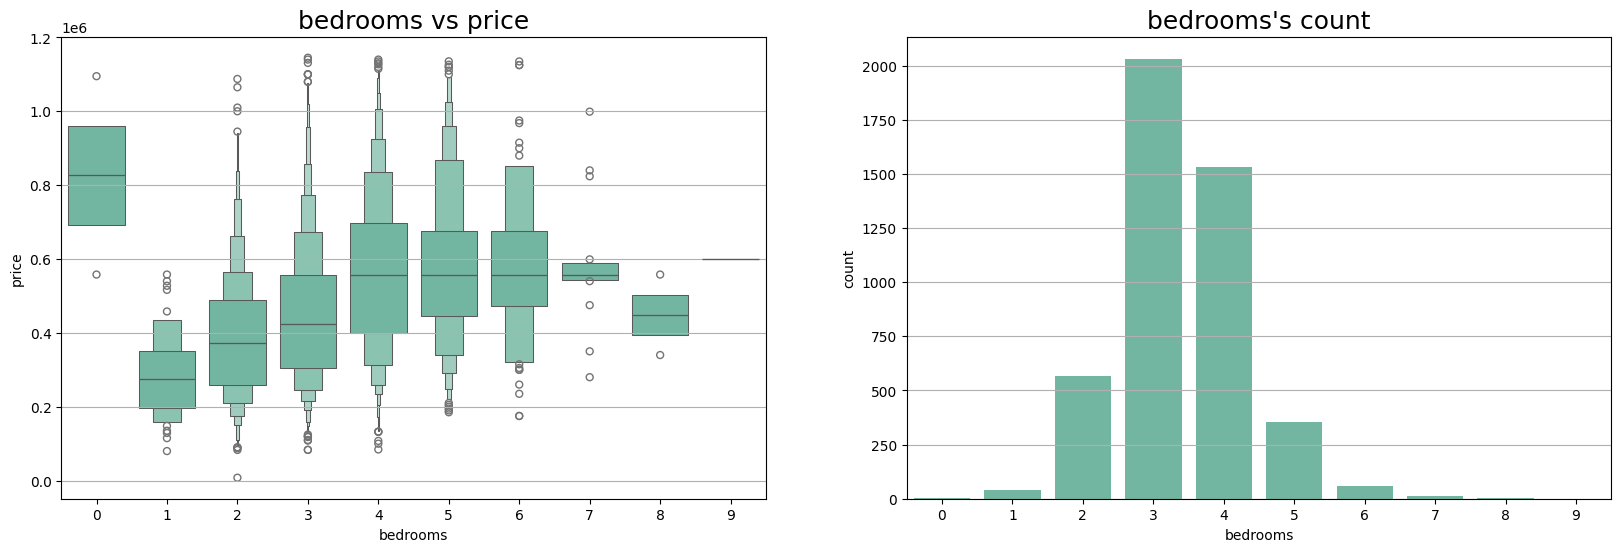

In [21]:
plt.figure(figsize=(20,6))
sns.set_palette("Set2")
plt.subplot(1,2,1)
draw_cate_vs_target(h_df, cate_features[0])

plt.subplot(1,2,2)
draw_cate_countplot(h_df, cate_features[0])

plt.show()

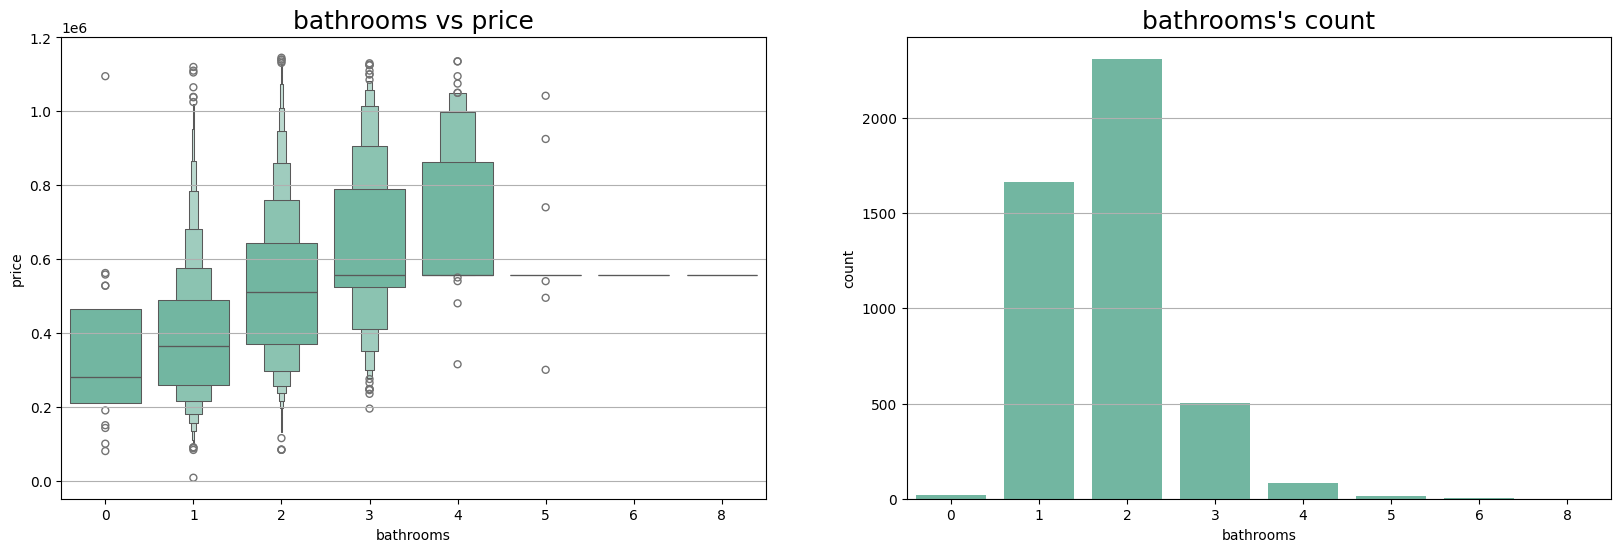

In [22]:
# draw a boxen plot and countplot for the bathrooms vs price
plt.figure(figsize=(20,6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[1])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[1])
plt.show()

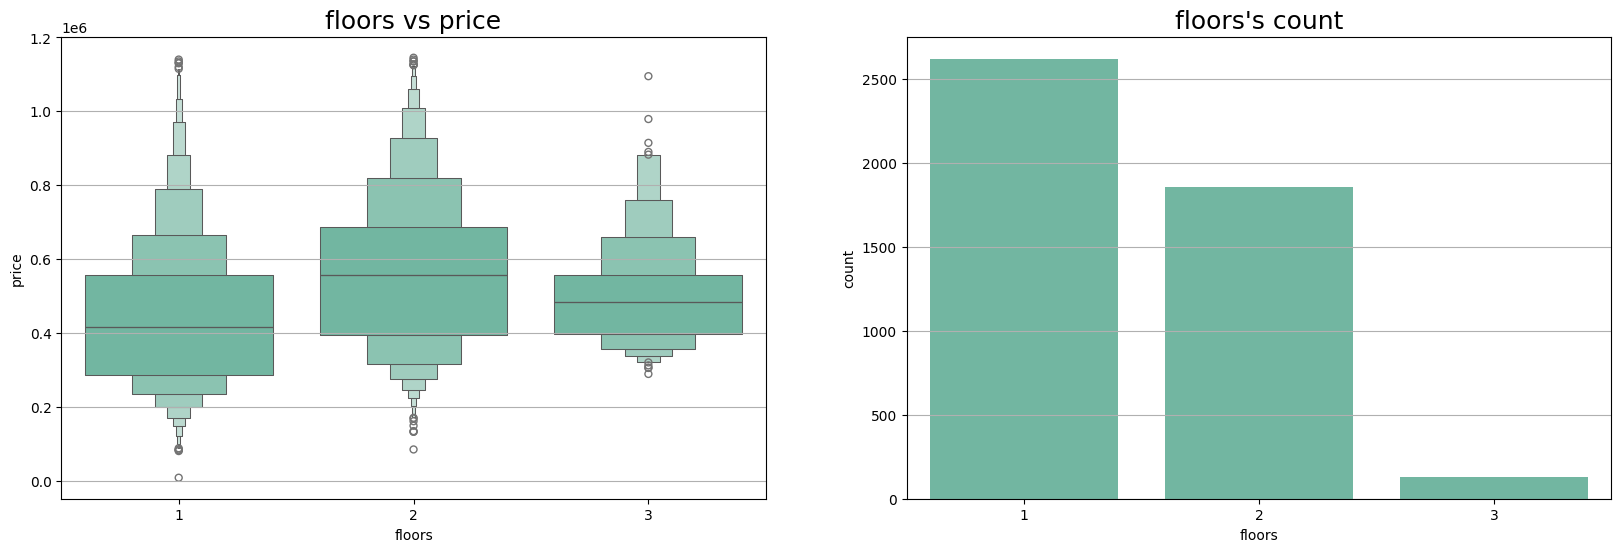

In [23]:
# draw a boxen plot of floors vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[2])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[2])
plt.show()  

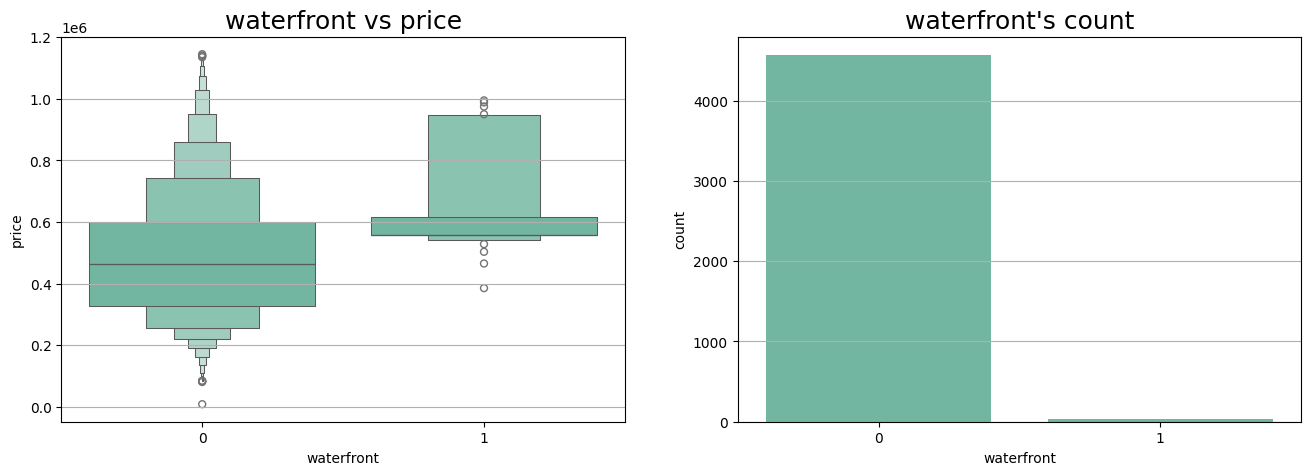

In [24]:
#draw a boxen and countplot for waterfront vs price
plt.figure(figsize=(16, 5))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[3])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[3])
plt.show()

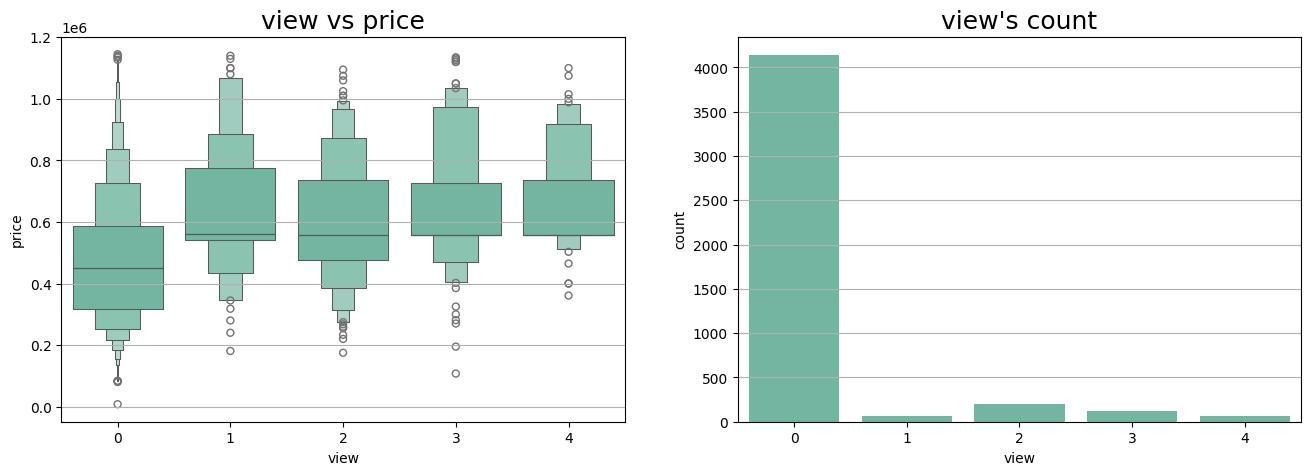

In [25]:
#draw a boxen and countplot for view vs price
# draw a boxen plot of view vs price
plt.figure(figsize=(16, 5))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[4])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[4])
plt.show()

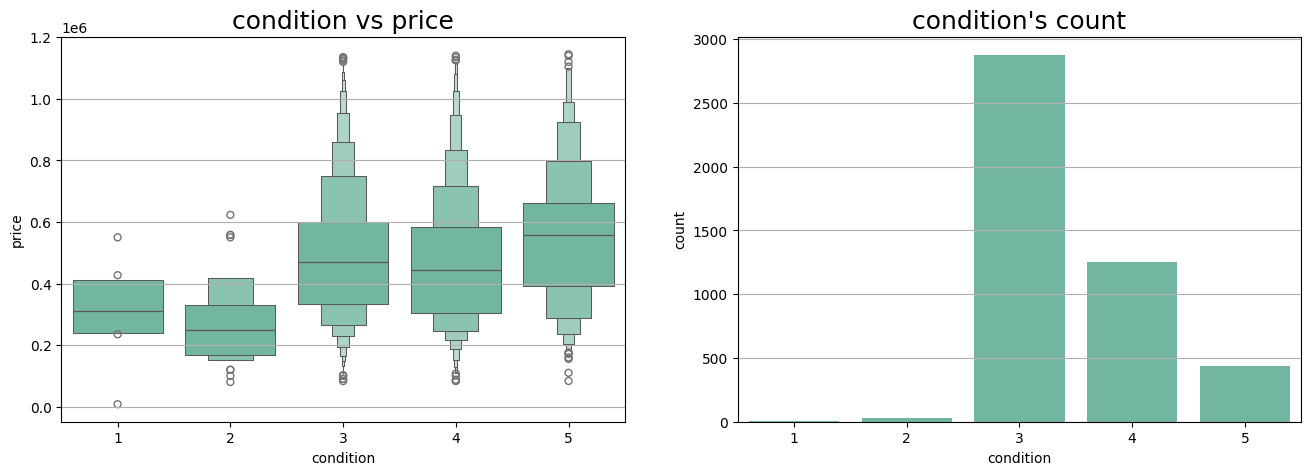

In [26]:
#draw a boxen and countplot for condition vs price

plt.figure(figsize=(16, 5))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[5])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[5])
plt.show()

In [27]:
numeric_features

['sqft_living',
 'yr_built',
 'statezip',
 'sqft_above',
 'yr_renovated',
 'sqft_basement',
 'price',
 'sqft_lot',
 'city']

In [28]:
h_df[numeric_features].describe()

,sqft_living,yr_built,statezip,sqft_above,yr_renovated,sqft_basement,price,sqft_lot,city
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,2139.35,1970.79,31.04,1827.27,808.61,283.81,490724.71,8329.17,8.55
std,963.21,29.73,19.65,862.17,979.41,406.60,207457.54,4286.73,9.16
min,370.00,1900.00,0.00,370.00,0.00,0.00,7800.00,638.00,0.00
25%,1460.00,1951.00,14.00,1190.00,0.00,0.00,328158.93,5000.75,1.00
50%,1980.00,1976.00,30.50,1590.00,0.00,0.00,468750.00,7683.00,4.00
75%,2620.00,1997.00,46.00,2300.00,1999.00,570.00,600000.00,11001.25,14.00
max,13540.00,2014.00,76.00,9410.00,2014.00,1520.00,1145000.00,20001.00,43.00


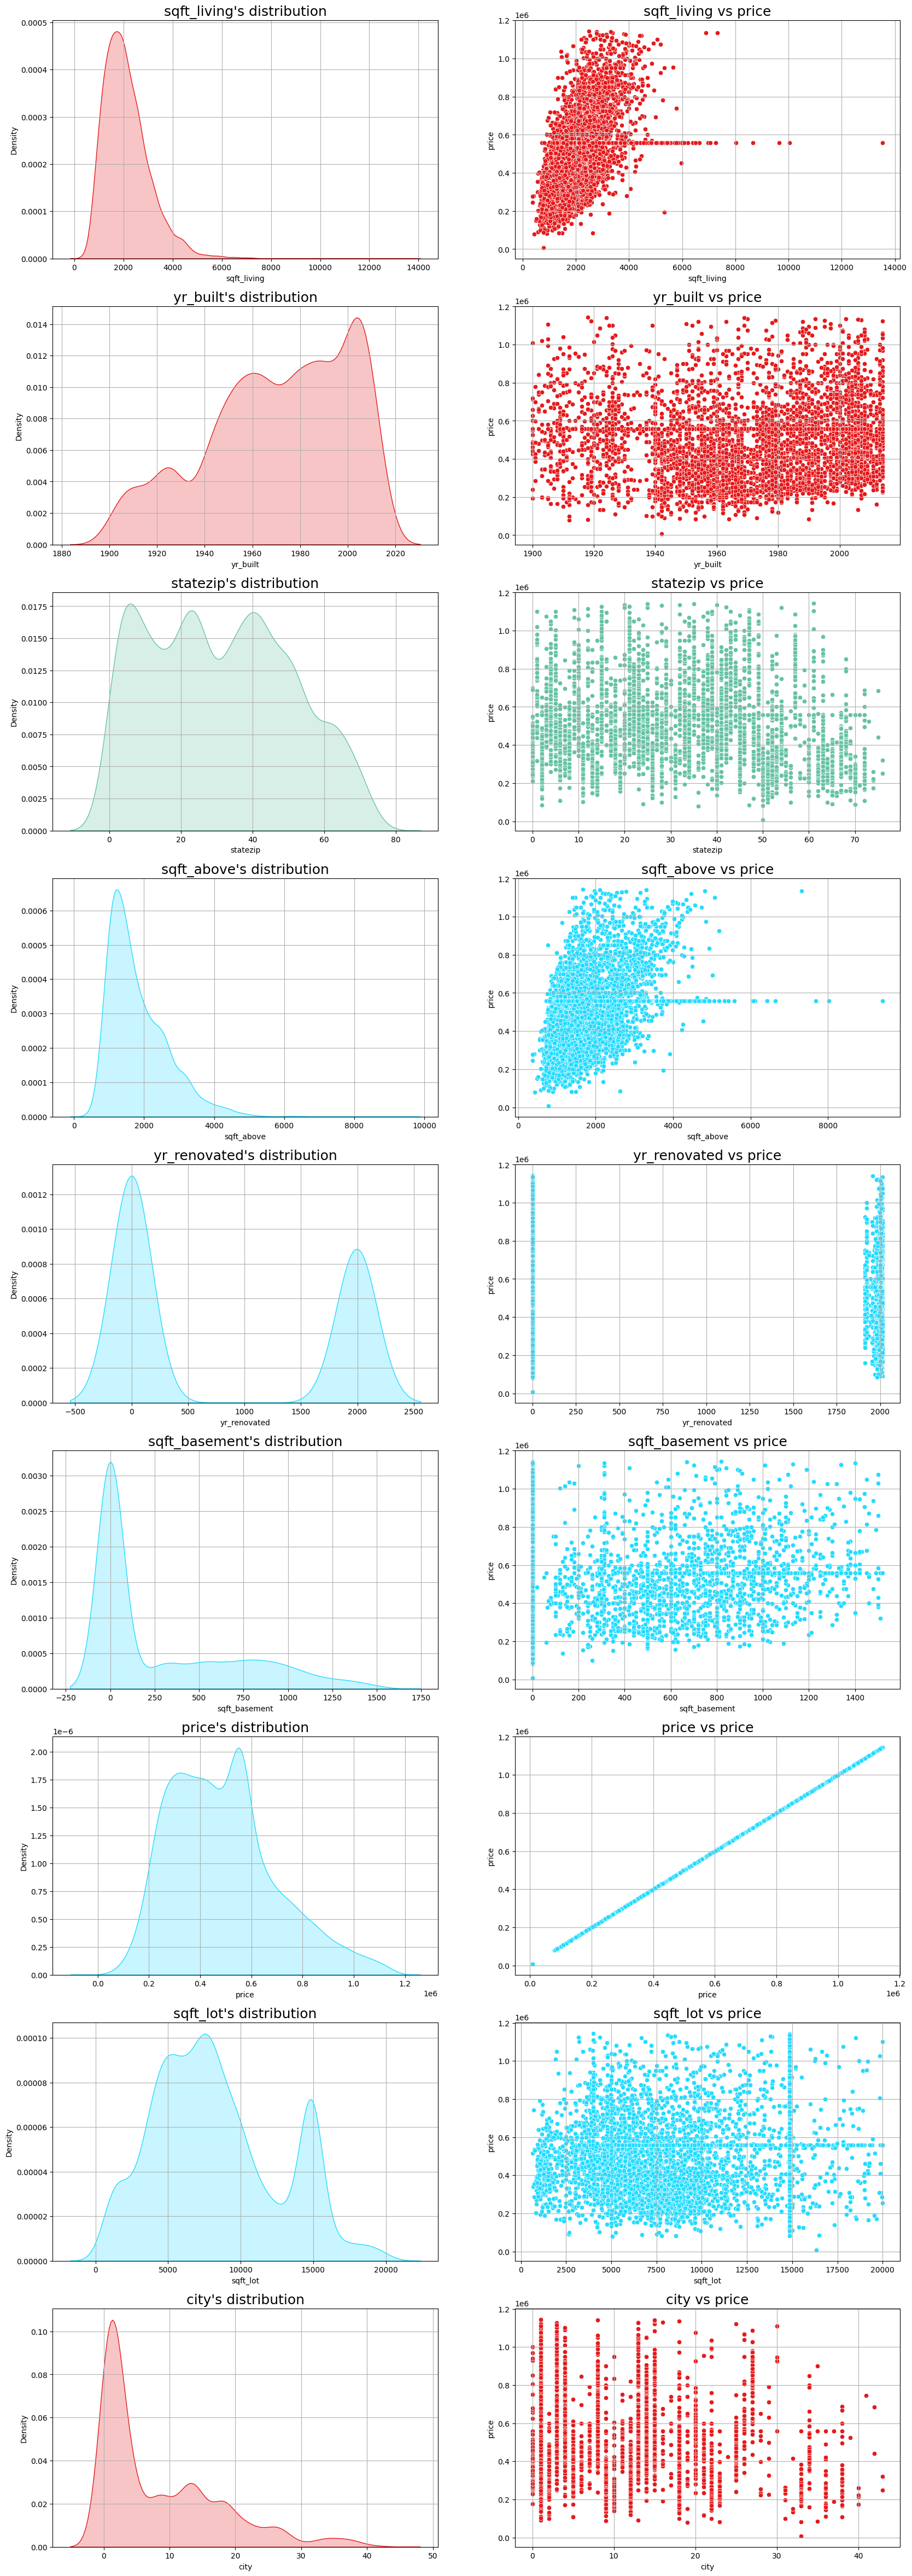

In [29]:
plt.figure(figsize=(20,60))

palettes = ['Set1', 'Set2', 'Set3', 'autumn', 'cool']
for i, feature in enumerate(numeric_features):
    sns.set_palette(random.choice(palettes))
    # distribution
    plt.subplot(len(numeric_features), 2, i+i+1)
    draw_numeric_dist(h_df, feature)
    # scatter
    plt.subplot(len(numeric_features), 2, i+i +2)
    draw_numeric_target_scatter(h_df, feature)
    
plt.show()
    

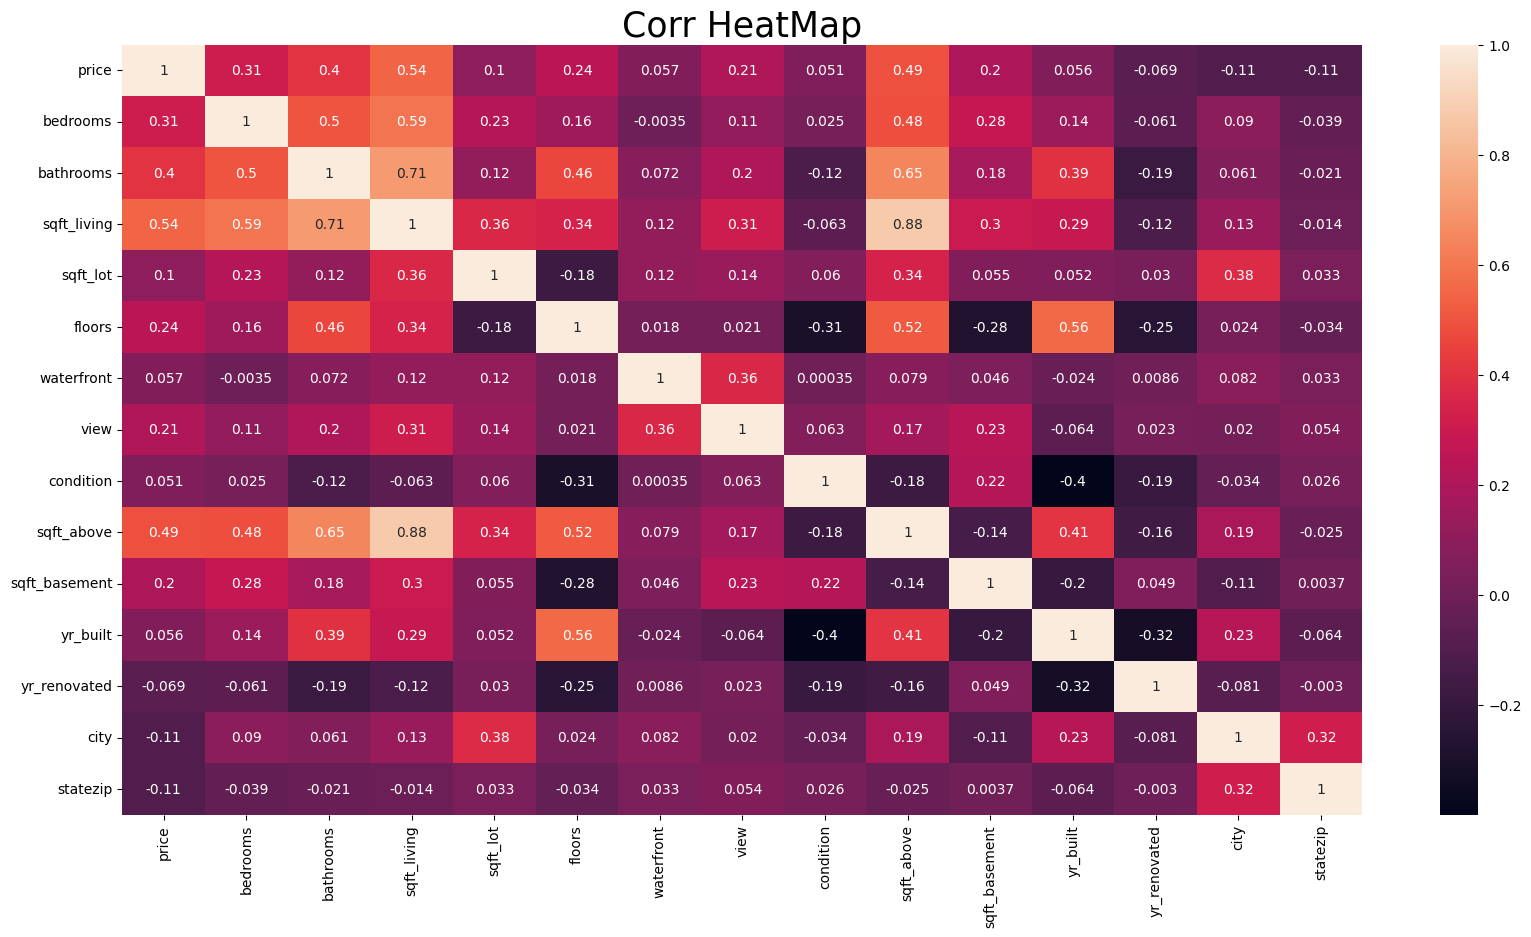

In [30]:
# Full correlation heatmap
# Only Numerical
# Only categorical
plt.figure(figsize=(20,10))
ax = sns.heatmap(h_df.corr(), annot=True)
ax.set_title("Corr HeatMap", fontdict={"fontsize": 25})
plt.show()

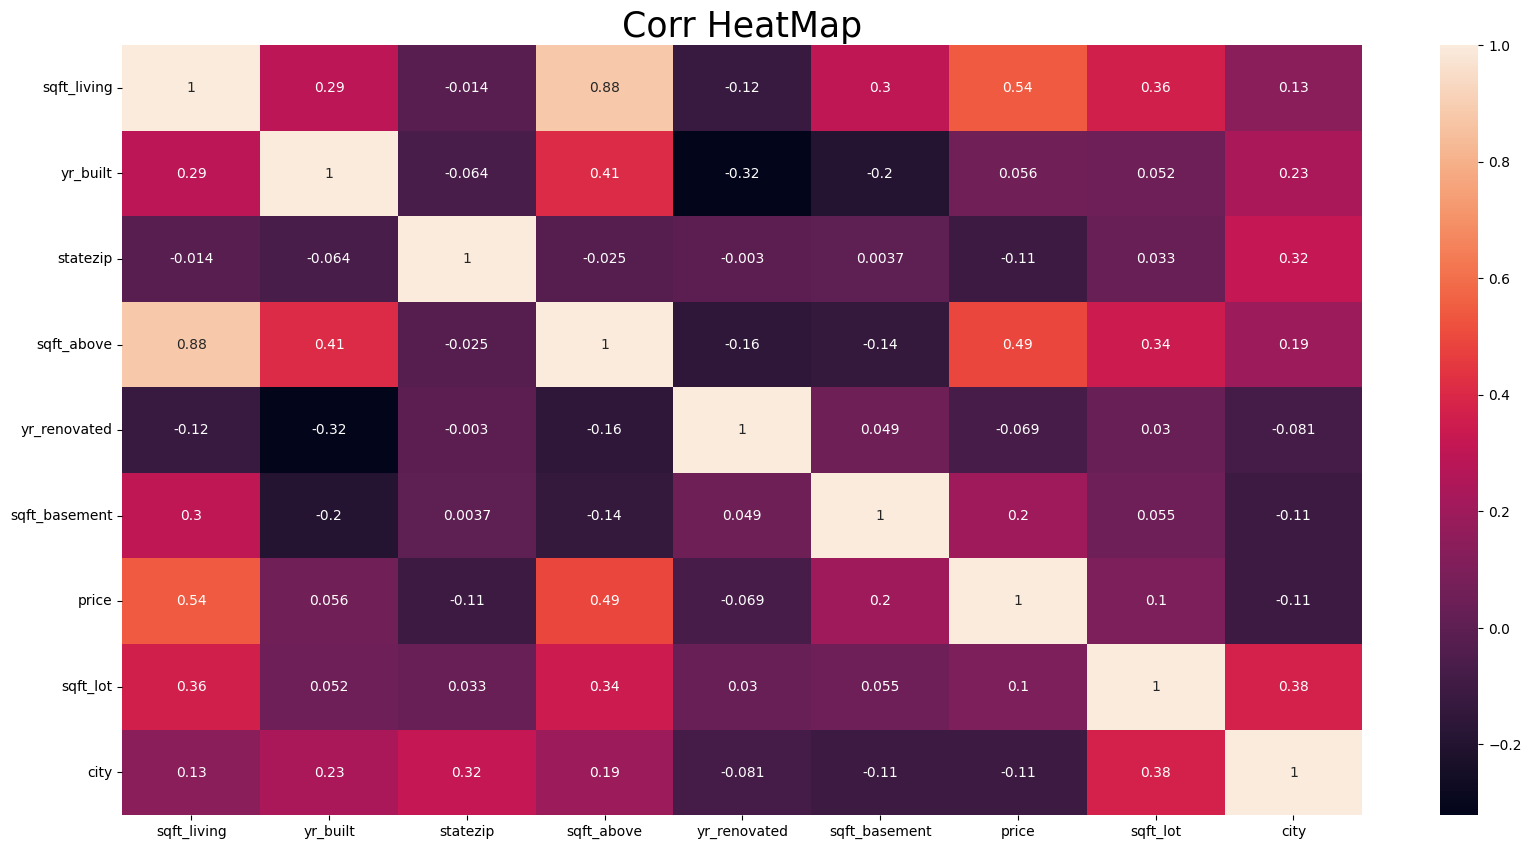

In [31]:
# Only Numeric
plt.figure(figsize=(20,10))
ax = sns.heatmap(h_df[numeric_features].corr(), annot=True)
ax.set_title("Corr HeatMap", fontdict={"fontsize": 25})
plt.show()

# MODELING PART

In [32]:
X = h_df.drop("price",axis = 1) #Dependent Variables (INPUT)
y = h_df['price'] #Independent Variables (OUTPUT)

In [33]:
def get_mi_score(X, y):
    mi = mutual_info_regression(X, y, random_state=10)
    mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi

In [34]:
mi_score = get_mi_score(X,y)
mi_score

statezip        0.38
sqft_living     0.32
city            0.30
sqft_above      0.22
bathrooms       0.15
yr_built        0.09
sqft_lot        0.07
bedrooms        0.06
floors          0.05
sqft_basement   0.05
view            0.04
waterfront      0.01
condition       0.01
yr_renovated    0.00
dtype: float64

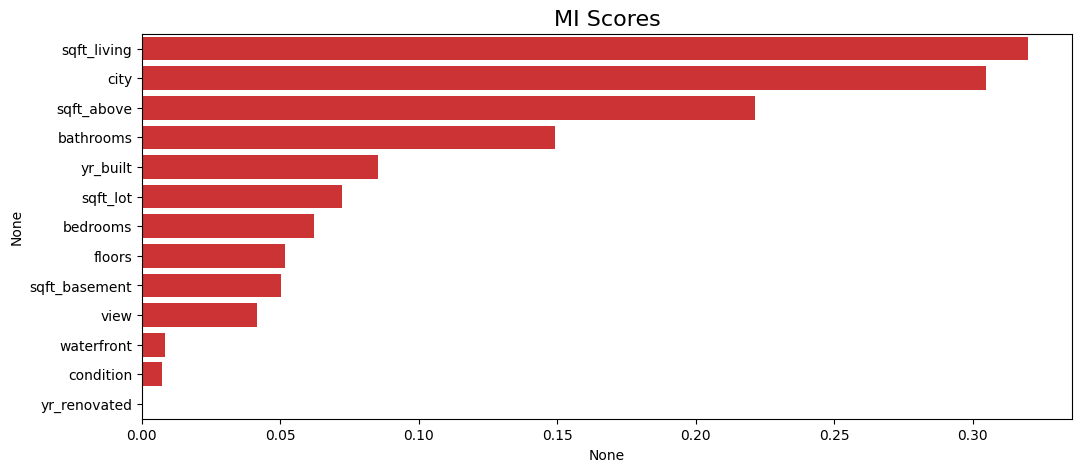

In [35]:
plt.figure(figsize=(12,5))
ax = sns.barplot(y=mi_score.index[1:], x=mi_score[1:])
ax.set_title("MI Scores", fontdict={"fontsize":16})
plt.show()

In [36]:
X.drop(["yr_renovated"], axis=1, inplace=True)

In [37]:
# split the trianing and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

### Random Forest

In [38]:
#Fit the data to model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

In [39]:
# perform cross-validation with Mean Squared Error (MSE)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and take the mean
mse_cv_scores_rf = -cv_scores_rf
average_mse_cv_rf = np.mean(mse_cv_scores_rf)

In [40]:
# Fit the model on the entire training dataset
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [41]:
#Make predictions
rf_pred = rf_model.predict(X_test)

In [42]:
# Evaluate the model using MSE on the test set
rf_mse = mean_squared_error(y_test,rf_pred)

In [43]:
print(f"Average Cross-Validated MSE:{average_mse_cv_rf}")
print(f"MSE on the Test Set:{rf_mse}")

Average Cross-Validated MSE:15533407415.119755
MSE on the Test Set:14574964514.93554


### Linear Regression

In [44]:
reg_model = LinearRegression()

In [45]:
# perform cross-validation with Mean Squared Error (MSE)
cv_scores_reg = cross_val_score(reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and take the mean
mse_cv_scores_reg = -cv_scores_reg
average_mse_cv_reg = np.mean(mse_cv_scores_reg)

In [46]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [47]:
reg_pred = reg_model.predict(X_test)

In [48]:
# Evaluate the model
reg_mse = mean_squared_error(y_test, reg_pred)

In [49]:
print(f"Average Cross-Validated MSE:{average_mse_cv_reg}")
print(f"MSE on the Test Set:{reg_mse}")

Average Cross-Validated MSE:27077847600.603603
MSE on the Test Set:27448888512.10078


### Save and Load Model

In [50]:
rf_model_file = open('random_forest_model.pkl','wb')
pickle.dump(rf_model,rf_model_file)

In [51]:
loaded_rf_model = pickle.load(open('random_forest_model.pkl','rb'))

In [52]:
# Map 'city' values to the encoded values
city_encoding = {
    'Shoreline': 0,
    'Seattle': 1,
    'Kent': 2,
    'Bellevue': 3,
    'Redmond': 4,
    'Maple Valley': 5,
    'North Bend': 6,
    'Lake Forest Park': 7,
    'Sammamish': 8,
    'Auburn': 9,
    'Des Moines': 10,
    'Bothell': 11,
    'Federal Way': 12,
    'Kirkland': 13,
    'Issaquah': 14,
    'Woodinville': 15,
    'Normandy Park': 16,
    'Fall City': 17,
    'Renton': 18,
    'Carnation': 19,
    'Snoqualmie': 20,
    'Duvall': 21,
    'Burien': 22,
    'Covington': 23,
    'Inglewood-Finn Hill': 24,
    'Kenmore': 25,
    'Newcastle': 26,
    'Mercer Island': 27,
    'Black Diamond': 28,
    'Ravensdale': 29,
    'Clyde Hill': 30,
    'Algona': 31,
    'Skykomish': 32,
    'Tukwila': 33,
    'Vashon': 34,
    'Yarrow Point': 35,
    'SeaTac': 36,
    'Medina': 37,
    'Enumclaw': 38,
    'Snoqualmie Pass': 39,
    'Pacific': 40,
    'Beaux Arts Village': 41,
    'Preston': 42,
    'Milton': 43
}

# Map 'statezip' values to the encoded values
statezip_encoding = {
    'WA 98133': 0,
    'WA 98119': 1,
    'WA 98042': 2,
    'WA 98008': 3,
    'WA 98052': 4,
    'WA 98115': 5,
    'WA 98038': 6,
    'WA 98045': 7,
    'WA 98155': 8,
    'WA 98105': 9,
    'WA 98074': 10,
    'WA 98106': 11,
    'WA 98007': 12,
    'WA 98092': 13,
    'WA 98198': 14,
    'WA 98006': 15,
    'WA 98102': 16,
    'WA 98011': 17,
    'WA 98125': 18,
    'WA 98003': 19,
    'WA 98136': 20,
    'WA 98033': 21,
    'WA 98029': 22,
    'WA 98117': 23,
    'WA 98034': 24,
    'WA 98072': 25,
    'WA 98023': 26,
    'WA 98107': 27,
    'WA 98166': 28,
    'WA 98116': 29,
    'WA 98024': 30,
    'WA 98055': 31,
    'WA 98077': 32,
    'WA 98027': 33,
    'WA 98059': 34,
    'WA 98075': 35,
    'WA 98014': 36,
    'WA 98065': 37,
    'WA 98199': 38,
    'WA 98053': 39,
    'WA 98058': 40,
    'WA 98122': 41,
    'WA 98103': 42,
    'WA 98112': 43,
    'WA 98005': 44,
    'WA 98118': 45,
    'WA 98177': 46,
    'WA 98004': 47,
    'WA 98019': 48,
    'WA 98144': 49,
    'WA 98168': 50,
    'WA 98001': 51,
    'WA 98056': 52,
    'WA 98146': 53,
    'WA 98028': 54,
    'WA 98148': 55,
    'WA 98057': 56,
    'WA 98040': 57,
    'WA 98010': 58,
    'WA 98051': 59,
    'WA 98031': 60,
    'WA 98109': 61,
    'WA 98030': 62,
    'WA 98126': 63,
    'WA 98032': 64,
    'WA 98178': 65,
    'WA 98288': 66,
    'WA 98108': 67,
    'WA 98070': 68,
    'WA 98188': 69,
    'WA 98002': 70,
    'WA 98039': 71,
    'WA 98022': 72,
    'WA 98068': 73,
    'WA 98047': 74,
    'WA 98050': 75,
    'WA 98354': 76
}

In [53]:
# Create a DataFrame with the independent variables
data = {
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [2000],
    'sqft_lot': [5000],
    'floors': [2],
    'waterfront': [0],
    'view': [3],
    'condition': [4],
    'sqft_above': [1800],
    'sqft_basement': [200],
    'yr_built': [1990],
    'city': ['Kent'],       # Replace with the actual city
    'statezip': ['WA 98133']     # Replace with the actual ZIP code
}

df = pd.DataFrame(data)

In [54]:
df['city'] = df['city'].map(city_encoding)
df['statezip'] = df['statezip'].map(statezip_encoding)

# Make predictions
predictions = loaded_rf_model.predict(df)

In [55]:
# Print the predicted prices
print("Predicted House Prices:")
for prediction in predictions:
    print(prediction)

Predicted House Prices:
505197.0
